# Quantum - Quantum Key Distribution & Balance Functions 

In [13]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector 
from qiskit.extensions import Initialize
from math import sqrt, pi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from qiskit_textbook.tools import array_to_latex, random_state
import numpy as np
from numpy.random import randint



## Quantum Key Distribution

In [17]:
def encode_message(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0:
            if bits[i] == 0:
                pass
            else:
                qc.x(0)
        else:
            qc.x(0)
            qc.h(0)
        qc.barrier()
        message.append(qc)
    return message 
        
def measure_message(message, bases):
    backend = Aer.get_backend('qasm_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0: # measuring in z-basis
            message[q].measure(0,0)
        if bases[q] == 1:
            message[q].h(0)
            message[q].measure(0,0)
        result = execute(message[q], backend, shots=1, memory=True).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            # If both used the same basis, add
            # this to the list of 'good' bits 
            good_bits.append(bits[q])
    return good_bits

def sample_bits(bits, selection):
    sample = []
    for i in selection:
        # use np.mod to make sure the 
        # bit we sample is always in 
        # the list range
        i = np.mod(1, len(bits))
        # pop(i) removes the element of the 
        # list as index 'i'
        sample.append(bits.pop(i))
    return sample


In [22]:
np.random.seed(seed=0)
n = 1000 

## step 1 - alice generates bits 
alice_bits = randint(2, size=n)

## step 2 - create an array to tell us which qubits 
# are encoded in which bases 
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## step 3 - decide which basis to measure in
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

## step 4 
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)

# step 5 
sample_size = 15
bit_selection = randint(n, size=sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
print(" bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print(" alice_sample = " + str(alice_sample))
if bob_sample == alice_sample:
    print("key is safe")
else:
    print("key is compromized")
print("Efficiency: " + str(len(bob_key)/n))

 bob_sample = [0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1]
 alice_sample = [0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1]
key is compromized
Efficiency: 0.474


## Lab Results Recorded - Observing Changes in Length of Bit Sequence

| N      | Efficiency |
| :---        |    :----   |
| 100      | 0.33       |
| 200      | 0.44       |
| 500      | 0.506       |
| 1000      | 0.474       |

How long of a sequence do you expect you will need to
get close to 50% efficiency?

Statistically the best we can do is 50%, since on average half of the bases pairs will be different. As we increase the number of bits the efficiency does go up but we will rarely get more than 50% (taken from lecture). So the length of the sequence does not really matter ( for reasons stated above), based on my results above a sequence length of 500 got ~51% efficiency whiles a sequence length of 1000 got ~47% efficiency. And looking at the results for N of 100, 200, 500, 1000 there in a noticable increase in efficiency as the sequence length goes up. 


In [29]:
np.random.seed(seed=5)
n = 100 

## step 1 - alice generates bits 
alice_bits = randint(2, size=n)

## step 2 - create an array to tell us which qubits 
# are encoded in which bases 
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## step 3 - decide which basis to measure in
bob_bases = randint(2, size=n)

# DANGER, DANGER, DANGER !!!
# Eve has intercepted the message 
# These 2 lines were added before bob measures the qubits. 
# so eve will be able to measure the qubits with a random 
# list basis before it reaches bob
eve_bases = randint(2, size=n)
intercapted_message = measure_message(message, eve_bases)

bob_results = measure_message(message, bob_bases)

## step 4 
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)

# step 5 
sample_size = 15
bit_selection = randint(n, size=sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
print(" bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print(" alice_sample = " + str(alice_sample))
if bob_sample == alice_sample:
    print("key is safe")
else:
    print("key is compromized")
print("Efficiency: " + str(len(bob_key)/n))

 bob_sample = [0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1]
 alice_sample = [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0]
key is compromized
Efficiency: 0.36


## Lab Results Recorded - Observing Number of Different Bits in the Sample Changes

| Seed Number | Different bits | Efficiency | Compromized Detected | N      |
| :----:      |    :----:      | :----:     | :----:               | :----: |
| 0           |      3         | 0.33       |      True            | 100    |
| 1           | 5              | 0.26       |      True            | 100    |
| 2           | 11             | 0.31       |      True            | 100    |
| 3           | 4              |   0.32     |      True            | 100    |
| 4           | 8              |   0.43     |      True            | 100    |
| 5           | 7              |   0.36     |      True            | 100    |

## Balanced Functions 

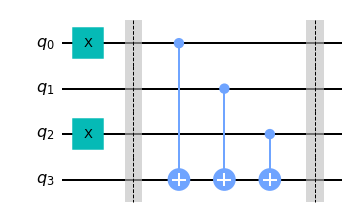

In [37]:
n = 3

balanced_oracle = QuantumCircuit(n+1)

#b_str determinmes the particular balanced function 

b_str = "101"

# place x-gates 
for qubit in range(len(b_str)):
    if b_str[qubit] == "1":
        balanced_oracle.x(qubit)

# use barrier as divider 
balanced_oracle.barrier()

# controlled-NOT gates 
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw('mpl')



In [40]:
backend = Aer.get_backend('qasm_simulator')

for i in range(8):
    qc = QuantumCircuit(n+1, 1)
    if i & 1:
        qc.x(0)
    if i & 2:
        qc.x(1)
    if i & 4:
        qc.x(2)
    qc.compose(balanced_oracle, inplace=True)
    qc.measure(3,0)
    result = execute(qc, backend, shots=1, memory=True).result()
    print("Input: ", i, ", Value of Classical Bit: ", result.get_memory()[0])

Input:  0 , Value of Classical Bit:  0
Input:  1 , Value of Classical Bit:  1
Input:  2 , Value of Classical Bit:  1
Input:  3 , Value of Classical Bit:  0
Input:  4 , Value of Classical Bit:  1
Input:  5 , Value of Classical Bit:  0
Input:  6 , Value of Classical Bit:  0
Input:  7 , Value of Classical Bit:  1


## Labs Results Recorded - Determining Circuit Balance
| Input      | Value of Classical Bit |
| :----:     |    :----:   |
| 0          | 0           |
| 1          | 1           |
| 2          |  1          |
| 3          | 0           |
| 4          | 1           |
| 5          | 0           |
| 6          | 0           |
| 7          | 1           |

Is the function balanced? 

Equal number of 0s and 1s, thus the function is balanced.  